In [1]:
# Step - 1 - Getting things ready for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the file  
tweet_df = pd.read_csv("SMSSpamCollection", sep="\t", names=['target', 'message'])
tweet_df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
tweet_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
tweet_df.columns

Index(['target', 'message'], dtype='object')

# Exploratory data analysis (EDA)

In [6]:
tweet_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
tweet_df.shape

(5572, 2)

In [8]:
tweet_df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

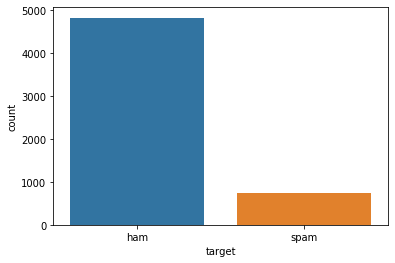

In [23]:
sns.countplot(x='target', data=tweet_df)

## Installing wordcloud 

In [9]:
!pip install wordcloud

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
df = tweet_df.loc[tweet_df['target']=='spam', :]

In [12]:
df.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [13]:
df['target'].value_counts()

spam    747
Name: target, dtype: int64

In [19]:
words = ' '.join(df['message'])
print(words)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [20]:
cleaned_word = " ".join([word for word in words.split()])

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

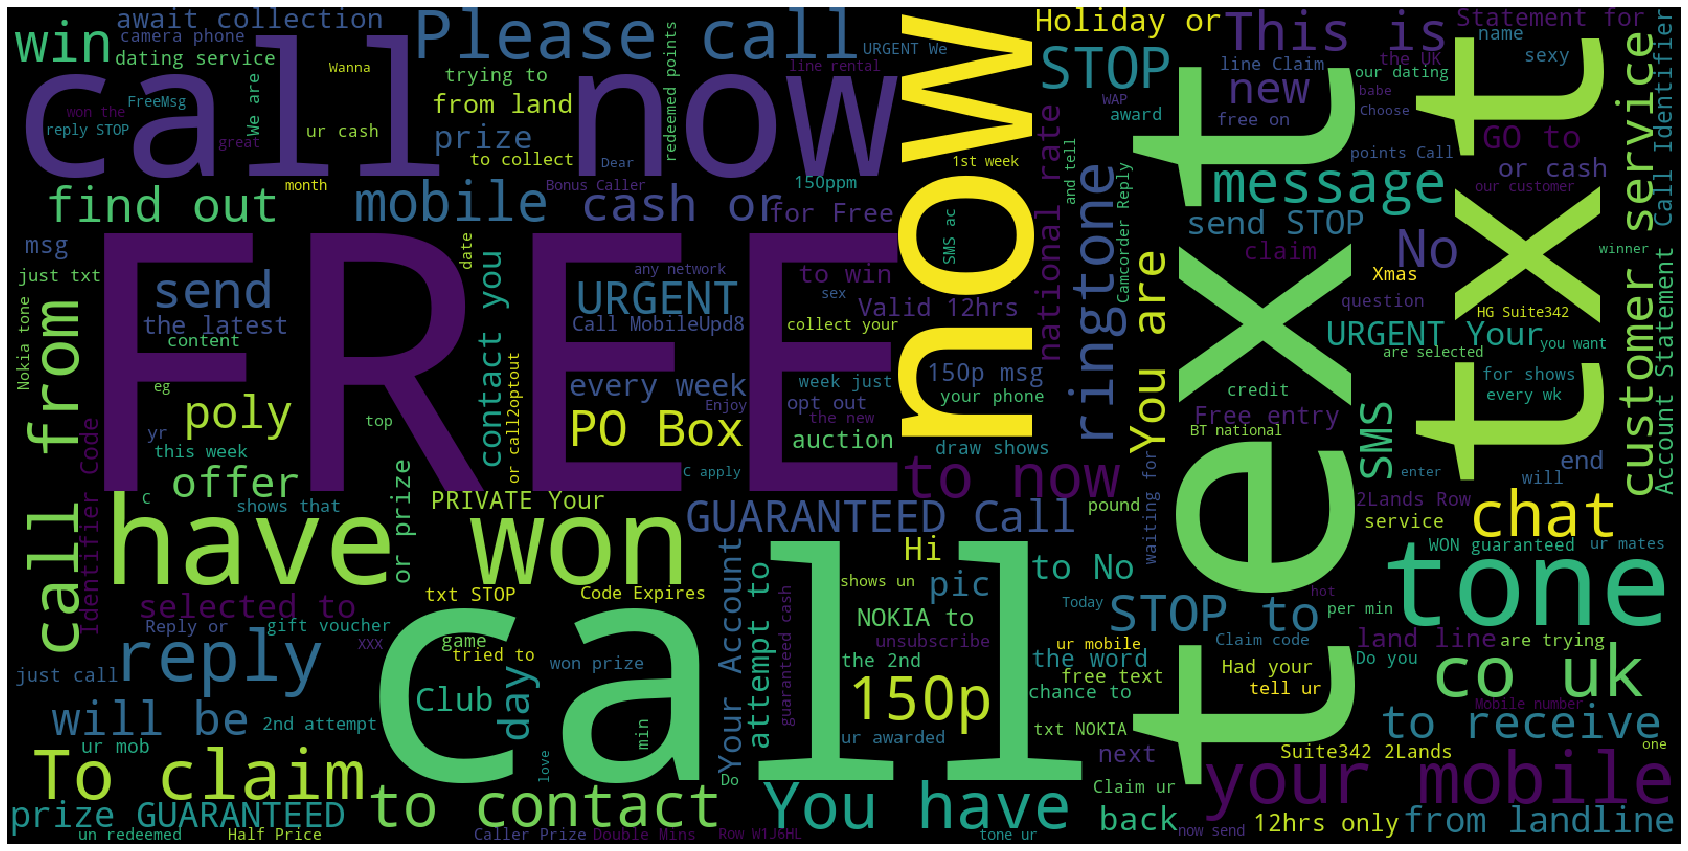

In [22]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Preprocessing the Data

In [23]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
# initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [25]:
# We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [26]:
# initializing the lists
clean_tweet_lst = []
tweet_len_lst = []

In [28]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    tweet_len_lst.append(len(words))

In [34]:
tweet_df['target_spam']=tweet_df['target'].apply(lambda x: 0 if x=='spam' else 1)

In [35]:
import nltk
nltk.download('stopwords')
clean_tweet_lst = []
tweet_len_lst = []

tweet_df['message'].apply(lambda x: preprocess(x, 'stem'))

tweet_df['clean_tweet_stem'] = clean_tweet_lst

tweet_df['tweet_length_stem'] = tweet_len_lst

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
import nltk
nltk.download('wordnet')
clean_tweet_lst = []
tweet_len_lst = []

tweet_df['message'].apply(lambda x: preprocess(x, 'lemma'))

tweet_df['clean_tweet_lema'] = clean_tweet_lst

tweet_df['tweet_length_lema'] = tweet_len_lst

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [37]:
tweet_df.head()

,target,message,target_spam,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,1,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,1,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah think goe usf live around though,7,nah think go usf life around though,7


# Preparation of Data

In [50]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
train, test = train_test_split(tweet_df,test_size=0.2,random_state=42)

In [51]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)

In [53]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [54]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


# Model Building and Evaluation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Logistic Regression

In [56]:
classifier = LogisticRegression()

In [58]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

fit = classifier.fit(dense_features,train['target_spam'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['target_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


Accuracy of LogisticRegression is 0.9838565022421525


In [59]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['target_spam'])
con_metric

array([[132,   1],
       [ 17, 965]], dtype=int64)

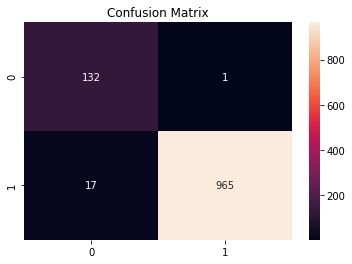

In [60]:
# heatmap
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [61]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['target_spam']))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       133
           1       1.00      0.98      0.99       982

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



# Decision Tree

In [62]:
classifier_dt = DecisionTreeClassifier(max_depth = 2)

In [63]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

fit = classifier_dt.fit(dense_features,train['target_spam'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['target_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9237668161434978


In [64]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['target_spam'])
con_metric

array([[105,  41],
       [ 44, 925]], dtype=int64)

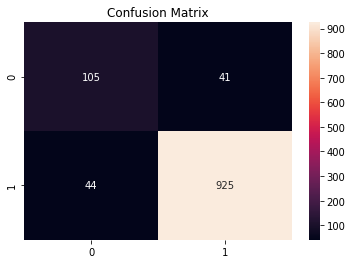

In [65]:
# heatmap
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [66]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['target_spam']))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       146
           1       0.96      0.95      0.96       969

    accuracy                           0.92      1115
   macro avg       0.83      0.84      0.83      1115
weighted avg       0.92      0.92      0.92      1115



# SVM

In [67]:
classifier_svc = SVC()

In [68]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

fit = classifier_svc.fit(dense_features,train['target_spam'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['target_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9838565022421525


In [69]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['target_spam'])
con_metric

array([[131,   0],
       [ 18, 966]], dtype=int64)

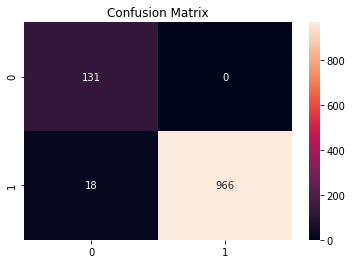

In [70]:
# heatmap
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [71]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['target_spam']))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       131
           1       1.00      0.98      0.99       984

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115

